## Problem Statement and Objectives

This dataset contains measurements taken on patients with malignant melanoma who underwent surgery at the Department of Plastic Surgery, University Hospital of Odense, Denmark, between 1962 and 1977. The surgical procedure involved complete removal of the tumor along with approximately 2.5cm of surrounding skin. The dataset includes key prognostic variables such as tumor thickness and ulceration status, which are believed to be significant factors in predicting patient outcomes. Patients were followed up until the end of 1977.

### Dataset Columns:

1. **time**: Survival time in days since the operation.
2. **status**: Patient status at the end of the study. 
   - 1 indicates death from melanoma.
   - 2 indicates being alive.
   - 3 indicates death from causes unrelated to melanoma.
3. **sex**: Patient's sex.
   - 1 represents male.
   - 0 represents female.
4. **age**: Age in years at the time of the operation.
5. **year**: Year of the operation.
6. **thickness**: Tumor thickness in millimeters (mm).
7. **ulcer**: Indicator of ulceration.
   - 1 indicates presence of ulceration.
   - 0 indicates absence of ulceration.

### Note:

- Patients' survival time, tumor characteristics, and other variables are included in this dataset.
- The dataset aims to facilitate research and analysis related to malignant melanoma prognosis and patient outcomes.


### Processes¶
**Data Gathering**: Collect relevant data related to food orders from the company's online portal.

**Data Importation**: Import the collected data into a suitable data analysis environment.

**Data cleaning**: Clean and preprocess the data to ensure accuracy and consistency.

**Feature Engineering**: Extract meaningful features from the data to: Explore the data to identify patterns, trends, and potential areas for improvement.

**Conclusions and Recommendations**: Summarize findings from the analysis and provide actionable recommendations for business enhancement based on the insights gained.

### Package Importation

In [6]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats 
import pingouin
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
%matplotlib inline

In [7]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 3CF6-C7AB

 Directory of C:\Users\agnes\OneDrive\Documents\GIZ Women in AI\Assignments

05/18/2024  08:39 AM    <DIR>          .
05/18/2024  08:39 AM    <DIR>          ..
05/14/2024  08:22 AM    <DIR>          .ipynb_checkpoints
05/17/2024  10:30 PM         4,457,919 Entrepreneurship and Adaptability.pptx
05/16/2024  10:06 AM         4,462,189 Entrepreneurship by Discover Template[1].pptx
05/13/2024  09:46 PM           663,436 FoodHub Data_Analysis.ipynb
03/21/2024  11:09 AM           123,933 foodhub_order.csv
04/02/2024  01:47 PM           689,686 Joelle's Copy Mid-Course Project (Data Analysis Project).ipynb
04/03/2024  08:56 AM        35,502,620 Joelles Excel Assignment.xlsx
05/18/2024  08:39 AM           293,584 Malignant Melanoma Patient Data.ipynb
03/27/2024  02:15 PM             5,127 melanoma.csv
04/11/2024  06:52 PM            12,962 Mid-Course Project (Data Analysis Project).ipynb
03/25/2024  09:42 AM        12,033,474

In [8]:
melanoma=pd.read_csv("melanoma.csv")

### Data Cleaning

#### Sanity Check

In [9]:
melanoma.head()

,time,status,sex,age,year,thickness,ulcer
0,10,3,1,76,1972,6.76,1
1,30,3,1,56,1968,0.65,0
2,35,2,1,41,1977,1.34,0
3,99,3,0,71,1968,2.90,0
4,185,1,1,52,1965,12.08,1


In [10]:
melanoma.tail()

,time,status,sex,age,year,thickness,ulcer
200,4492,2,1,29,1965,7.06,1
201,4668,2,0,40,1965,6.12,0
202,4688,2,0,42,1965,0.48,0
203,4926,2,0,50,1964,2.26,0
204,5565,2,0,41,1962,2.90,0


In [11]:
melanoma.dtypes

time           int64
status         int64
sex            int64
age            int64
year           int64
thickness    float64
ulcer          int64
dtype: object

In [12]:
melanoma.describe()

,time,status,sex,age,year,thickness,ulcer
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,2152.800000,1.790244,0.385366,52.463415,1969.907317,2.919854,0.439024
std,1122.060667,0.551204,0.487873,16.671711,2.575563,2.959433,0.497483
min,10.000000,1.000000,0.000000,4.000000,1962.000000,0.100000,0.000000
25%,1525.000000,1.000000,0.000000,42.000000,1968.000000,0.970000,0.000000
50%,2005.000000,2.000000,0.000000,54.000000,1970.000000,1.940000,0.000000
75%,3042.000000,2.000000,1.000000,65.000000,1972.000000,3.560000,1.000000
max,5565.000000,3.000000,1.000000,95.000000,1977.000000,17.420000,1.000000


In [13]:

melanoma["time"]=melanoma["time"].astype(int)
melanoma["year"]=melanoma["year"].astype(str)
melanoma["sex"]=melanoma["sex"].astype(str)
melanoma["ulcer"]=melanoma["ulcer"].astype(str)
melanoma["status"]=melanoma["status"].astype(int)


melanoma

,time,status,sex,age,year,thickness,ulcer
0,10,3,1,76,1972,6.76,1
1,30,3,1,56,1968,0.65,0
2,35,2,1,41,1977,1.34,0
3,99,3,0,71,1968,2.90,0
4,185,1,1,52,1965,12.08,1
...,...,...,...,...,...,...,...
200,4492,2,1,29,1965,7.06,1
201,4668,2,0,40,1965,6.12,0
202,4688,2,0,42,1965,0.48,0
203,4926,2,0,50,1964,2.26,0


In [14]:
melanoma.dtypes

time           int32
status         int32
sex           object
age            int64
year          object
thickness    float64
ulcer         object
dtype: object

In [15]:
melanoma.isnull().sum()

time         0
status       0
sex          0
age          0
year         0
thickness    0
ulcer        0
dtype: int64

In [16]:
melanoma.duplicated().sum()

0

In [17]:
melanoma["age"].max()

95

<function matplotlib.pyplot.show(close=None, block=None)>

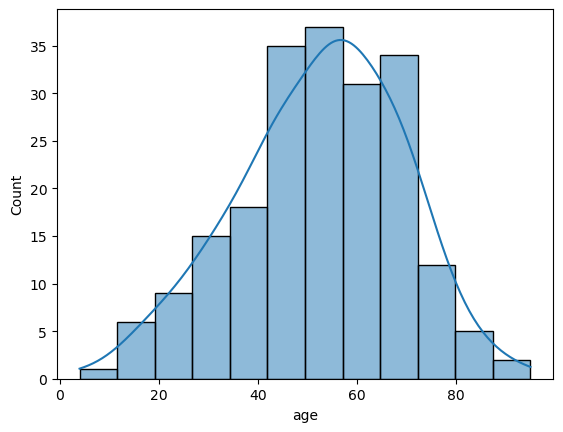

In [18]:
sns.histplot(x=melanoma["age"], kde=True)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

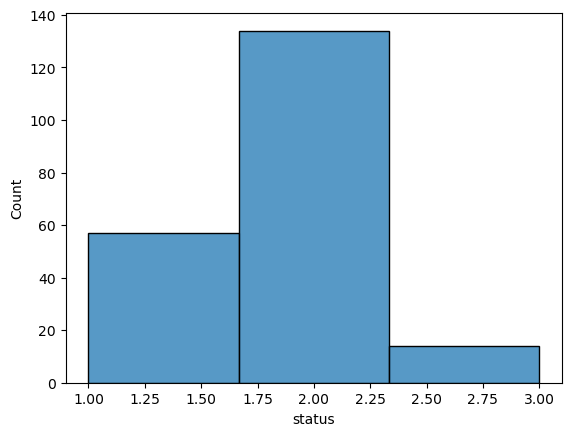

In [19]:
sns.histplot(melanoma["status"], bins=3)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

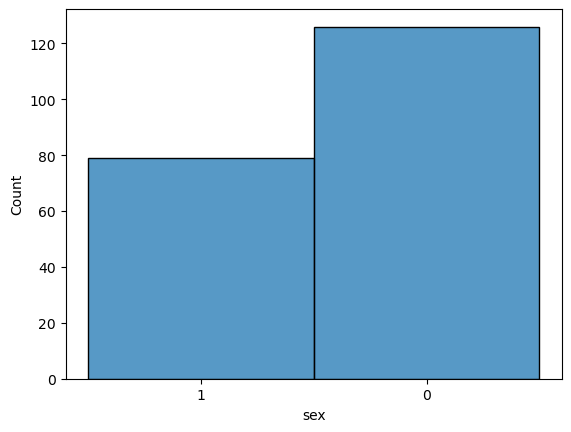

In [20]:
sns.histplot(melanoma["sex"], bins=3)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

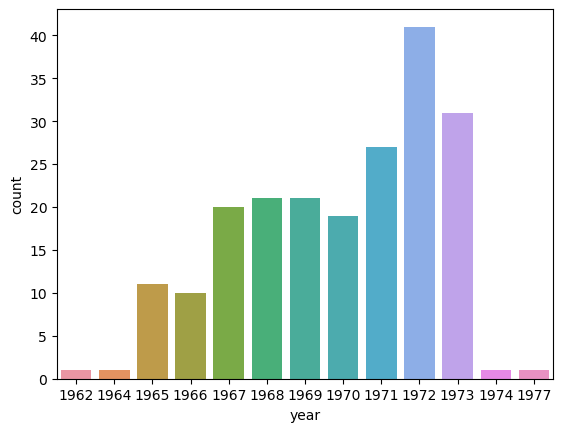

In [21]:
sns.countplot(x=melanoma["year"].sort_values())
plt.title=("Distribution of the Year")
plt.show

In [22]:
melanoma.head()


,time,status,sex,age,year,thickness,ulcer
0,10,3,1,76,1972,6.76,1
1,30,3,1,56,1968,0.65,0
2,35,2,1,41,1977,1.34,0
3,99,3,0,71,1968,2.90,0
4,185,1,1,52,1965,12.08,1


In [75]:
age_by_group=melanoma.groupby("sex")[["age"]].value_counts()
age_by_group

sex  age
0    58     7
     42     5
     69     5
     65     5
     60     5
           ..
1    28     1
     29     1
     34     1
     35     1
     95     1
Name: count, Length: 106, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

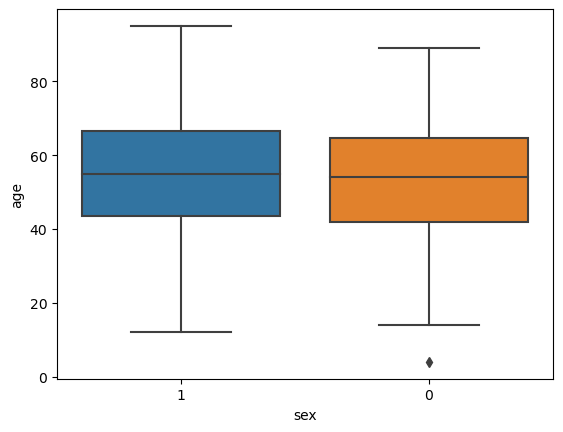

In [87]:
sns.boxplot(x="sex", y="age", data=melanoma)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

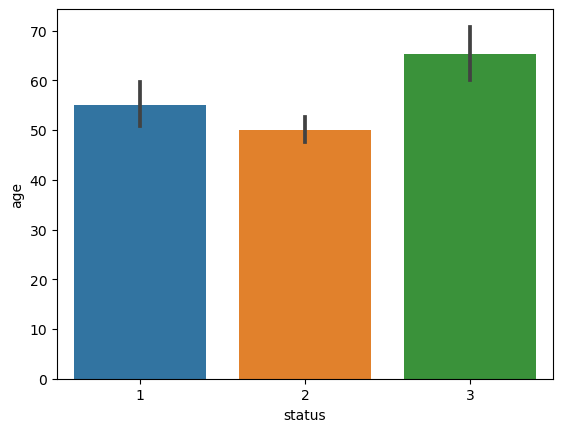

In [76]:
sns.barplot(x="status", y="age", data = melanoma)

plt.show

## Analysis for average survival time of ulceration vs no ulceration 
   
    checking for the assumptions and T test
    
    Defining the null and alternative hypothesis

**null hypothesis**: There is no difference between average survival rate for people with no ulceration 
    and people with ulceration
    
**alternative hypothesis**: The survival rate for people with no ulceration is greater than that of 
    people with ulceration
    
    
    Alpha = 0.05

In [100]:

melanoma["status"]=melanoma["status"].astype(str)

no_ulcer=melanoma[(melanoma["ulcer"]=="0") & (melanoma["status"]!="3")]["time"]
no_ulcer

2        35
25      817
28      858
29      869
30      872
       ... 
197    4310
201    4668
202    4688
203    4926
204    5565
Name: time, Length: 108, dtype: int32

<function matplotlib.pyplot.show(close=None, block=None)>

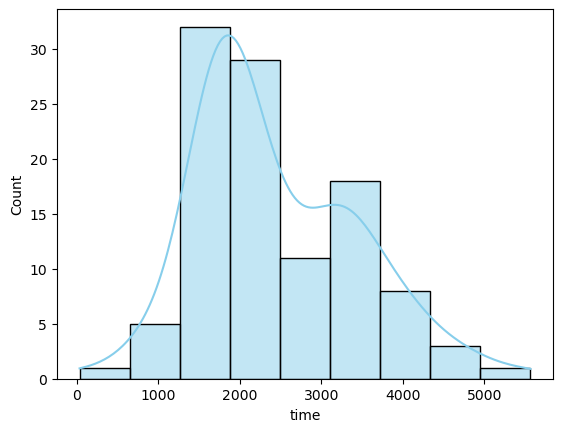

In [104]:
sns.histplot(x=no_ulcer, data=melanoma, kde=True, color="skyblue")
plt.show

In [99]:
people_with_ulcer=melanoma[(melanoma["ulcer"]=="1") & (melanoma["status"]!="3")]["time"]
people_with_ulcer

4       185
5       204
6       210
8       232
9       279
       ... 
190    3909
195    4124
198    4390
199    4479
200    4492
Name: time, Length: 83, dtype: int32

<function matplotlib.pyplot.show(close=None, block=None)>

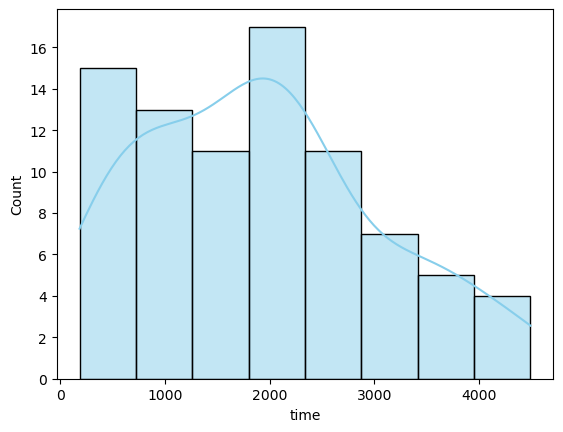

In [103]:
sns.histplot(x=people_with_ulcer, data=melanoma, kde=True, color="skyblue")
plt.show

In [114]:
np.var(people_with_ulcer)

1271517.0323704456

In [115]:
np.var(no_ulcer)

994600.6025377229

In [116]:
np.var(people_with_ulcer)/np.var(no_ulcer)

1.278419728608821

In [117]:
test_results = pingouin.ttest(x=no_ulcer, y=people_with_ulcer, paired=False, alternative= "greater")
test_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.427872,164.481086,greater,0.000384,"[279.33, inf]",0.508574,68.008,0.966129


### Observation





* Alpha is greater than the p_value. Thus we can reject the null hypothesis to conclude that 

  the survival rate for people without ulceration is higher than those with ulceration


## Analysis for checking if thickness affects status using cross tabulation chi square
   
Defining the null and alternative hypothesis

**null hypothesis**: thickness does not affect status of patients
    and people with ulceration
    
**alternative**: Thickness affects the status of patients in determining whether they will survive after the surgery
    
    
    Alpha = 0.05

<function matplotlib.pyplot.show(close=None, block=None)>

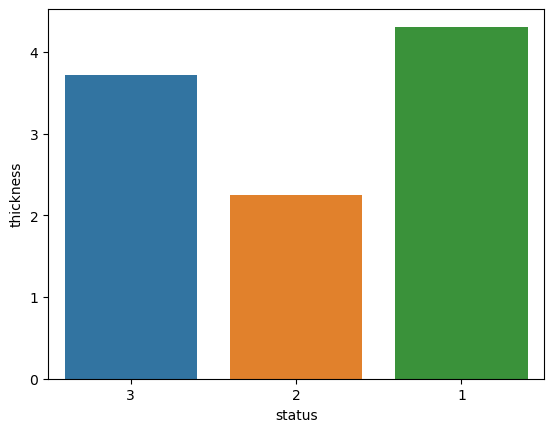

In [109]:
#thickness and status

#check if thickness affects status...cross tabulation chi square

sns.barplot(x= "status", y="thickness", data=melanoma, errorbar=None)
plt.show

In [128]:
thickness_status_tabulation = pd.crosstab(index= melanoma['thickness'],columns=melanoma['status'])
thickness_status_tabulation





status,1,2,3
thickness,,,
0.10,0,1,0
0.16,0,6,1
0.24,0,1,0
0.32,1,5,0
0.48,0,4,0
...,...,...,...
12.56,0,0,1
12.88,1,1,0
13.85,1,0,0


In [129]:
stats.chi2_contingency(thickness_status_tabulation)

Chi2ContingencyResult(statistic=156.7847944654069, pvalue=0.03275068834723104, dof=126, expected_freq=array([[ 0.27804878,  0.65365854,  0.06829268],
       [ 1.94634146,  4.57560976,  0.47804878],
       [ 0.27804878,  0.65365854,  0.06829268],
       [ 1.66829268,  3.92195122,  0.4097561 ],
       [ 1.11219512,  2.61463415,  0.27317073],
       [ 0.27804878,  0.65365854,  0.06829268],
       [ 1.11219512,  2.61463415,  0.27317073],
       [ 2.7804878 ,  6.53658537,  0.68292683],
       [ 3.05853659,  7.1902439 ,  0.75121951],
       [ 3.05853659,  7.1902439 ,  0.75121951],
       [ 0.27804878,  0.65365854,  0.06829268],
       [ 1.11219512,  2.61463415,  0.27317073],
       [ 4.44878049, 10.45853659,  1.09268293],
       [ 0.55609756,  1.30731707,  0.13658537],
       [ 0.27804878,  0.65365854,  0.06829268],
       [ 0.83414634,  1.96097561,  0.20487805],
       [ 0.27804878,  0.65365854,  0.06829268],
       [ 3.33658537,  7.84390244,  0.8195122 ],
       [ 0.27804878,  0.65365854, 

In [131]:
chi2,p,dof,exp = stats.chi2_contingency(thickness_status_tabulation)
print('chi2 :',chi2)
print( )
print('p_value:',p)
print( )
print('Degree of freedom:',dof)
print( )
print('Expected frequency:',exp)

chi2 : 156.7847944654069

p_value: 0.03275068834723104

Degree of freedom: 126

Expected frequency: [[ 0.27804878  0.65365854  0.06829268]
 [ 1.94634146  4.57560976  0.47804878]
 [ 0.27804878  0.65365854  0.06829268]
 [ 1.66829268  3.92195122  0.4097561 ]
 [ 1.11219512  2.61463415  0.27317073]
 [ 0.27804878  0.65365854  0.06829268]
 [ 1.11219512  2.61463415  0.27317073]
 [ 2.7804878   6.53658537  0.68292683]
 [ 3.05853659  7.1902439   0.75121951]
 [ 3.05853659  7.1902439   0.75121951]
 [ 0.27804878  0.65365854  0.06829268]
 [ 1.11219512  2.61463415  0.27317073]
 [ 4.44878049 10.45853659  1.09268293]
 [ 0.55609756  1.30731707  0.13658537]
 [ 0.27804878  0.65365854  0.06829268]
 [ 0.83414634  1.96097561  0.20487805]
 [ 0.27804878  0.65365854  0.06829268]
 [ 3.33658537  7.84390244  0.8195122 ]
 [ 0.27804878  0.65365854  0.06829268]
 [ 0.55609756  1.30731707  0.13658537]
 [ 2.7804878   6.53658537  0.68292683]
 [ 0.83414634  1.96097561  0.20487805]
 [ 0.27804878  0.65365854  0.06829268]
 [ 

### Observation
* The p_value 0.03 is less than the alpha which is 0.05. Thus we reject the null hypothesis. 
  Which is to say that The thickness of the skin affects the status of the patient after surgery

## Analysis for checking if Ulceration affects Status
   
Defining the null and alternative hypothesis

**Null hypothesis**: Ulceration of the skin does not affect the status of patients after the surgery.

**Alternative hypothesis**: Ulceration of the skin affects the status of the survival of the patients. 
    
    
    Alpha = 0.05

<function matplotlib.pyplot.show(close=None, block=None)>

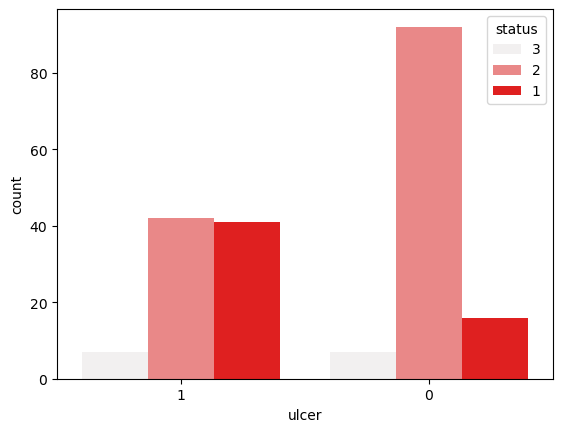

In [135]:
#sns.barplot(x= "status", y="ulcer", data=melanoma, errorbar=None)
sns.countplot(x= "ulcer", hue="status", data=melanoma,  color='red')
plt.show

In [150]:
ulceration_status = pd.crosstab(index= melanoma['ulcer'],columns=melanoma['status'])
ulceration_status



status,1,2,3
ulcer,,,
0,16,92,7
1,41,42,7


In [151]:
stats.chi2_contingency(ulceration_status)

Chi2ContingencyResult(statistic=26.97400835891734, pvalue=1.388892099355888e-06, dof=2, expected_freq=array([[31.97560976, 75.17073171,  7.85365854],
       [25.02439024, 58.82926829,  6.14634146]]))

In [152]:
chi2,p,dof,exp = stats.chi2_contingency(ulceration_status)
print('chi2 :',chi2)
print( )
print('p_value:',p)
print( )
print('Degree of freedom:',dof)
print( )
print('Expected frequency:',exp)

chi2 : 26.97400835891734

p_value: 1.388892099355888e-06

Degree of freedom: 2

Expected frequency: [[31.97560976 75.17073171  7.85365854]
 [25.02439024 58.82926829  6.14634146]]


### Observations

* P_Value 1.39 is greater than Alpha which is set at 0.05. We fail to reject null hypothesis.
  We can then conclude that ulceration affects the survival rate of the patients after the surgery 

## Analysis for checking if ulceration affect thickness
   
Defining the null hypothesis and alternative

**Null hypothesis**: thickness does not affect status of patients
    and people with ulceration
    
**Alternative hypothesis**: Thickness affects the status of patients in determining whether they will survive after the surgery
    
    
    Alpha = 0.05

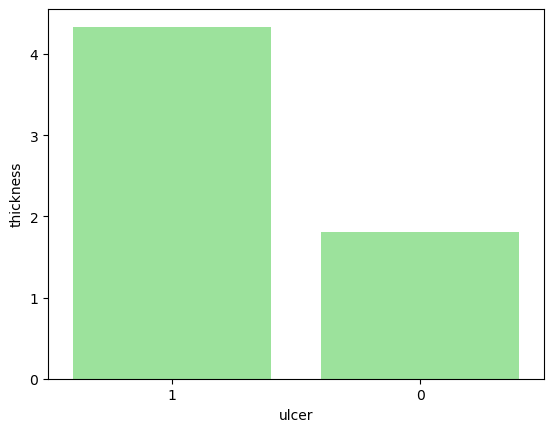

In [155]:
sns.barplot(x="ulcer", y="thickness", data=melanoma, errorbar=None, color="lightgreen")
plt.show()

In [231]:
ulceration_thickness=pd.crosstab(index= melanoma['ulcer'],columns=melanoma['thickness'])



ulceration_thickness




thickness,0.10,0.16,0.24,0.32,0.48,0.58,0.64,0.65,0.81,0.97,...,8.38,8.54,9.66,12.08,12.24,12.56,12.88,13.85,14.66,17.42
ulcer,,,,,,,,,,,,,,,,,,,,,
0,1,6,1,5,4,1,4,10,9,10,...,0,0,1,0,0,0,1,0,1,0
1,0,1,0,1,0,0,0,0,2,1,...,1,1,0,1,1,1,1,1,0,1


In [230]:
stats.chi2_contingency(ulceration_thickness)

Chi2ContingencyResult(statistic=107.75447635429518, pvalue=0.00038375535413033194, dof=63, expected_freq=array([[0.56097561, 3.92682927, 0.56097561, 3.36585366, 2.24390244,
        0.56097561, 2.24390244, 5.6097561 , 6.17073171, 6.17073171,
        0.56097561, 2.24390244, 8.97560976, 1.12195122, 0.56097561,
        1.68292683, 0.56097561, 6.73170732, 0.56097561, 1.12195122,
        5.6097561 , 1.68292683, 0.56097561, 2.80487805, 0.56097561,
        0.56097561, 5.04878049, 0.56097561, 1.68292683, 1.12195122,
        5.6097561 , 4.48780488, 0.56097561, 3.36585366, 0.56097561,
        0.56097561, 1.12195122, 0.56097561, 0.56097561, 1.12195122,
        2.80487805, 1.68292683, 1.12195122, 0.56097561, 1.12195122,
        1.12195122, 0.56097561, 0.56097561, 1.12195122, 1.12195122,
        0.56097561, 1.12195122, 0.56097561, 0.56097561, 0.56097561,
        0.56097561, 0.56097561, 0.56097561, 0.56097561, 0.56097561,
        1.12195122, 0.56097561, 0.56097561, 0.56097561],
       [0.43902439, 3.

In [228]:
chi2,p,dof,exp = stats.chi2_contingency(ulceration_thickness)

print('chi2 :',chi2)
print( )
print('p_value:',p)
print( )
print('Degree of freedom:',dof)
print( )
print('Expected frequency:',exp)

chi2 : 107.75447635429518

p_value: 0.00038375535413033194

Degree of freedom: 63

Expected frequency: [[0.56097561 3.92682927 0.56097561 3.36585366 2.24390244 0.56097561
  2.24390244 5.6097561  6.17073171 6.17073171 0.56097561 2.24390244
  8.97560976 1.12195122 0.56097561 1.68292683 0.56097561 6.73170732
  0.56097561 1.12195122 5.6097561  1.68292683 0.56097561 2.80487805
  0.56097561 0.56097561 5.04878049 0.56097561 1.68292683 1.12195122
  5.6097561  4.48780488 0.56097561 3.36585366 0.56097561 0.56097561
  1.12195122 0.56097561 0.56097561 1.12195122 2.80487805 1.68292683
  1.12195122 0.56097561 1.12195122 1.12195122 0.56097561 0.56097561
  1.12195122 1.12195122 0.56097561 1.12195122 0.56097561 0.56097561
  0.56097561 0.56097561 0.56097561 0.56097561 0.56097561 0.56097561
  1.12195122 0.56097561 0.56097561 0.56097561]
 [0.43902439 3.07317073 0.43902439 2.63414634 1.75609756 0.43902439
  1.75609756 4.3902439  4.82926829 4.82926829 0.43902439 1.75609756
  7.02439024 0.87804878 0.43902439

### Observations

* P_Value 0.00038 is less than Alpha which is set at 0.05. We reject null hypothesis.
  We can then conclude that ulceration affects the the thickness of the skin of the patients after the surgery 

## Analysis for checking if Gender affect Thickness
   
Defining the null and alternative hypothesis

**Null hypothesis**: Gender does not affect the Thickness of patients

**Alternative hypothesis**: Gender affects the thickness
    
    
    Alpha = 0.05

<function matplotlib.pyplot.show(close=None, block=None)>

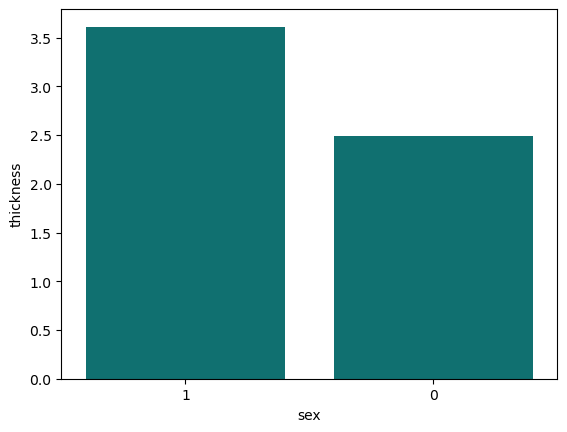

In [173]:
#check if gender affects thickness 

sns.barplot(x= "sex", y="thickness", data=melanoma, errorbar=None, color ="teal")
plt.show


In [237]:
thin_condition = (melanoma["thickness"] < 1)
medium_condition = (melanoma["thickness"] >= 1) & (melanoma["thickness"] <= 4)
thick_condition = (melanoma["thickness"] > 4)


melanoma["new_thickness"] = np.select([thin_condition, medium_condition, thick_condition],
                                       ["Thin", "Medium", "Thick"], default="")

melanoma.head()

,time,status,sex,age,year,thickness,ulcer,new_thickness
0,10,3,1,76,1972,6.76,1,Thick
1,30,3,1,56,1968,0.65,0,Thin
2,35,2,1,41,1977,1.34,0,Medium
3,99,3,0,71,1968,2.90,0,Medium
4,185,1,1,52,1965,12.08,1,Thick


In [232]:
gender_thickness=pd.crosstab(index= melanoma['sex'],columns=melanoma['new_thickness'])

gender_thickness



new_thickness,Medium,Thick,Thin
sex,,,
0,75,15,36
1,29,30,20


In [233]:
stats.chi2_contingency(gender_thickness)
chi2,p,dof,exp = stats.chi2_contingency(gender_thickness)
print('chi2 :',chi2)
print( )
print('p_value:',p)
print( )
print('Degree of freedom:',dof)
print( )
print('Expected frequency:',exp)

chi2 : 20.203973304674033

p_value: 4.099802544338971e-05

Degree of freedom: 2

Expected frequency: [[63.92195122 27.65853659 34.4195122 ]
 [40.07804878 17.34146341 21.5804878 ]]


### Observation

* The P_value is 0.000004 which is less than the alpha which is also 0.05. 
  So we can firmly reject the null hypothesis. Which is to say that gender greatly affects the thickness of the skin.

## Analysis for checking if Gender affect Survival Rate
   
Define your null hypothesis and alternative

* Null hypothesis: Gender daffects the survival rate of patients
* Alternative hypothesis: Gender does not affect the survival rate of patients
    
    
    Alpha = 0.05

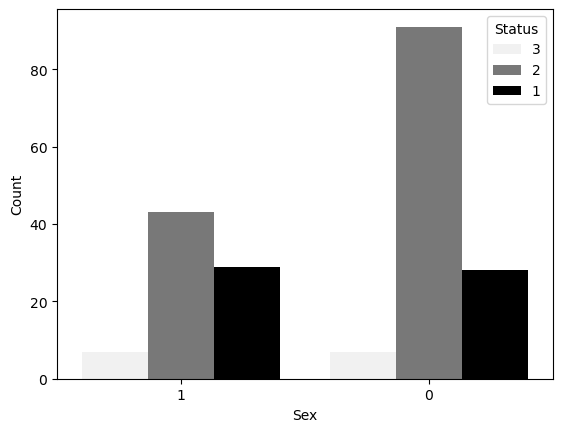

In [197]:
#check if gender affects average survival time

sns.countplot(x="sex", hue="status", data=melanoma, color='k')

plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()



In [235]:
# Perform chi-square test of independence
gender_survivals=pd.crosstab(index= melanoma['sex'],columns=melanoma['status'])

gender_survival


status,1,2,3
sex,,,
0,28,91,7
1,29,43,7


In [236]:
stats.chi2_contingency(gender_survivals)
chi2,p,dof,exp = stats.chi2_contingency(gender_survival)

print('chi2 :',chi2)
print( )
print('p_value:',p)
print( )
print('Degree of freedom:',dof)
print( )
print('Expected frequency:',exp)

chi2 : 6.793032579349164

p_value: 0.033489735513817676

Degree of freedom: 2

Expected frequency: [[35.03414634 82.36097561  8.60487805]
 [21.96585366 51.63902439  5.39512195]]


### Observation

* The P_value0.033 is less than the alpha. We will reject the null hypothesis. This is to say that gender affects our survival rate but not so significantly.

In [29]:
# melanoma["time"]=melanoma["time"].astype(int)
melanoma["sex"]=melanoma["sex"].astype(int)
melanoma["year"]=melanoma["year"].astype(int)
melanoma["ulcer"]=melanoma["ulcer"].astype(int)

In [30]:
melanoma.head()

,time,status,sex,age,year,thickness,ulcer
0,10,3,1,76,1972,6.76,1
1,30,3,1,56,1968,0.65,0
2,35,2,1,41,1977,1.34,0
3,99,3,0,71,1968,2.90,0
4,185,1,1,52,1965,12.08,1


In [31]:
melanoma.dtypes

time           int32
status         int32
sex            int32
age            int64
year           int32
thickness    float64
ulcer          int32
dtype: object

### SURVIVAL RATE ANALYSIS

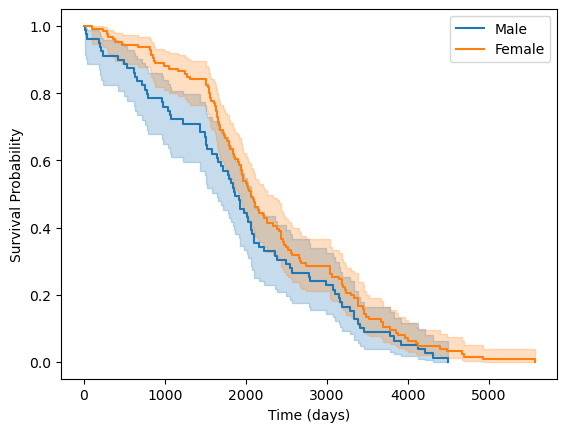

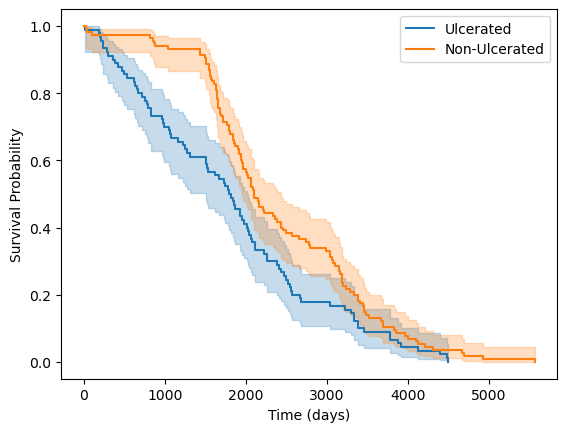

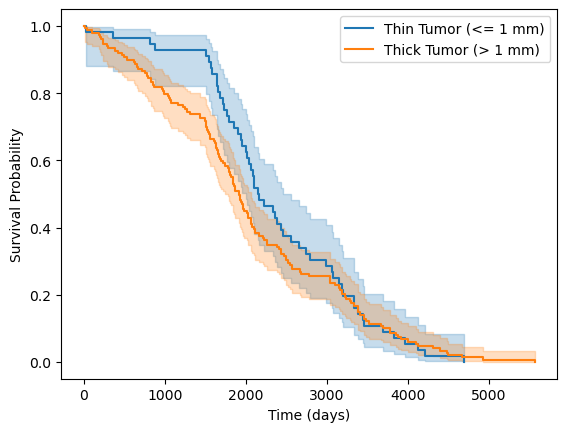

In [34]:
from lifelines import KaplanMeierFitter

# Initialize KaplanMeierFitter
kmf = KaplanMeierFitter()

# Stratify by sex
male_data = melanoma[melanoma['sex'] == 1]
female_data = melanoma[melanoma['sex'] == 0]

# Fit Kaplan-Meier curves for each group
kmf.fit(male_data['time'], event_observed=male_data['status'], label='Male')
ax = kmf.plot()

kmf.fit(female_data['time'], event_observed=female_data['status'], label='Female')
ax = kmf.plot(ax=ax)

# Add labels and title
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
# plt.title('Kaplan-Meier Curves Stratified by Sex')

# Show the plot
plt.show()

# Stratify by ulceration status
ulcerated_data = melanoma[melanoma['ulcer'] == 1]
non_ulcerated_data = melanoma[melanoma['ulcer'] == 0]

# Fit Kaplan-Meier curves for each group
kmf.fit(ulcerated_data['time'], event_observed=ulcerated_data['status'], label='Ulcerated')
ax = kmf.plot()

kmf.fit(non_ulcerated_data['time'], event_observed=non_ulcerated_data['status'], label='Non-Ulcerated')
ax = kmf.plot(ax=ax)

# Add labels and title
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
# plt.title('Kaplan-Meier Curves Stratified by Ulceration Status')

# Show the plot
plt.show()

# Stratify by tumor thickness (let's say thickness <= 1 mm vs. thickness > 1 mm)
thin_tumor_data = melanoma[melanoma['thickness'] <= 1]
thick_tumor_data = melanoma[melanoma['thickness'] > 1]

# Fit Kaplan-Meier curves for each group
kmf.fit(thin_tumor_data['time'], event_observed=thin_tumor_data['status'], label='Thin Tumor (<= 1 mm)')
ax = kmf.plot()

kmf.fit(thick_tumor_data['time'], event_observed=thick_tumor_data['status'], label='Thick Tumor (> 1 mm)')
ax = kmf.plot(ax=ax)

# Add labels and title
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
# plt.title('Kaplan-Meier Curves Stratified by Tumor Thickness')

# Show the plot
plt.show()


Iteration 1: norm_delta = 9.13e-01, step_size = 0.9500, log_lik = -889.79790, newton_decrement = 6.40e+01, seconds_since_start = 0.0
Iteration 2: norm_delta = 4.50e-01, step_size = 0.9500, log_lik = -818.53289, newton_decrement = 7.77e+00, seconds_since_start = 0.0
Iteration 3: norm_delta = 1.24e-01, step_size = 0.9500, log_lik = -810.04726, newton_decrement = 4.24e-01, seconds_since_start = 0.1
Iteration 4: norm_delta = 6.55e-03, step_size = 1.0000, log_lik = -809.60974, newton_decrement = 1.08e-03, seconds_since_start = 0.1
Iteration 5: norm_delta = 1.70e-05, step_size = 1.0000, log_lik = -809.60867, newton_decrement = 7.20e-09, seconds_since_start = 0.1
Convergence success after 5 iterations.
               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
sex        0.123689   1.131664  0.149497       -0.169320        0.416699   
age        0.009659   1.009705  0.004994       -0.000129        0.0

<Axes: xlabel='log(HR) (95% CI)'>

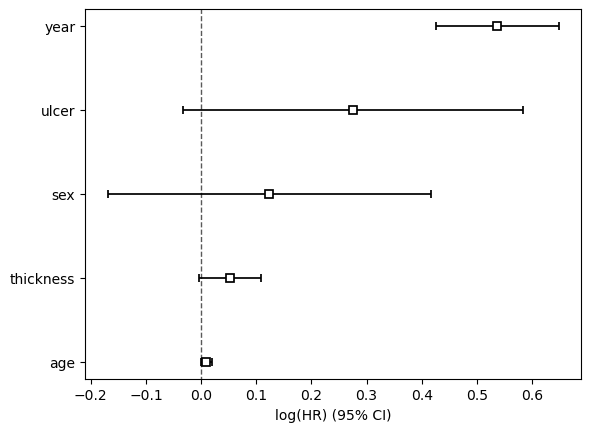

In [39]:

from lifelines import CoxPHFitter



# # Initialize Cox proportional hazards regression model
# cph = CoxPHFitter()

# # Fit the model to the data
# cph.fit(melanoma, duration_col='time', event_col='status', show_progress=True)

# # Print the summary of the fitted model
# print(cph.summary())

# # Plot the coefficients
# cph.plot()

cph = CoxPHFitter()

# Fit the model to the data
cph.fit(melanoma, duration_col='time', event_col='status', show_progress=True)

# Print the summary of the fitted model
print(cph.summary)

# Plot the coefficients
cph.plot()



### Observation

The year of operation emerges as the most significant predictor of patient survival, indicating that temporal trends or advancements in treatment protocols over time may have influenced patient outcomes. While age, sex, tumor thickness, and ulceration status show some associations with survival, further investigation or consideration of additional factors may be necessary to fully understand their impact.

In [40]:
!pip install lifelines


In [57]:
from lifelines.statistics import logrank_test


# Assuming you have already loaded and preprocessed your data
# Let's say you have a DataFrame named melanoma

# Define the groups you want to compare
group1 = melanoma[melanoma['ulcer'] == 0]  # Group without ulceration
group2 = melanoma[melanoma['ulcer'] == 1]  # Group with ulceration

# Perform log-rank test
results = logrank_test(group1['time'], group2['time'], event_observed_A=group1['status'], event_observed_B=group2['status'])

# Print the results
print("p-value:", results.p_value)
print("test statistic:", results.test_statistic)


p-value: 0.006077825044899579
test statistic: 7.527082638586181


### Observation
The p-value we obtained (approximately 0.0061) indicates that there is a significant difference in survival between patients with ulcer and those without ulcer. The test statistic associated with this result is approximately 7.5271. This suggests that the difference in survival between these groups is relatively large.This indicates that ulceration status is associated with significant differences in survival among melanoma patients.

In [58]:
from lifelines.statistics import logrank_test

# Assuming you have already loaded and preprocessed your data
# Let's say you have a DataFrame named melanoma

# Define the groups you want to compare
female_group = melanoma[melanoma['sex'] == 0]  # Group for females
male_group = melanoma[melanoma['sex'] == 1]    # Group for males

# Perform log-rank test
results_sex = logrank_test(female_group['time'], male_group['time'], event_observed_A=female_group['status'], event_observed_B=male_group['status'])

# Print the results
print("p-value for sex:", results_sex.p_value)
print("test statistic for sex:", results_sex.test_statistic)


p-value for sex: 0.08349991939054366
test statistic for sex: 2.9954265761673584


### Observation
The p-value obtained (around 0.0835) suggests that there might be a difference in survival between females and males. However, this difference is not strong enough to be considered significant at the usual threshold of 0.05. So, while it's worth noting, we can't be confident that the difference we see isn't just due to chance. Further investigation or analysis might help us understand this difference better.

## Conclusion

After conducting a comprehensive analysis of the melanoma dataset, several key findings have emerged regarding the impact of various factors on patient outcomes following surgery. These findings provide valuable insights into the prognosis and management of melanoma patients.

#### Gender and Skin Thickness:

The analysis revealed a significant association between gender and the thickness of the skin surrounding the tumor. With a p-value of 0.000004, we firmly reject the null hypothesis, indicating that gender significantly influences skin thickness. 

#### Gender and Survival Rate:

While gender was found to affect the survival rate of melanoma patients, the impact was not as pronounced as skin thickness. The p-value of 0.033 suggests a statistically significant but relatively moderate influence of gender on survival outcomes. Healthcare professionals should be aware of gender disparities in survival rates and tailor treatment strategies accordingly.

#### Ulceration and Skin Thickness:

Ulceration status was strongly associated with variations in skin thickness post-surgery. The p-value of 0.00038 indicates a clear rejection of the null hypothesis, highlighting the significant effect of ulceration on skin thickness. Monitoring and managing ulceration status may therefore be crucial in predicting post-operative outcomes and guiding treatment decisions.


#### Ulceration and Survival Rate:

Surprisingly, ulceration status did not demonstrate a statistically significant impact on patient survival rates. With a p-value of 1.39, we fail to reject the null hypothesis, suggesting that ulceration may not be a direct predictor of survival outcomes following surgery. However, further investigation into potential confounding factors or interactions is warranted to better understand this relationship.


#### Skin Thickness and Patient Status:

The analysis revealed a significant association between skin thickness and patient status post-surgery. With a p-value of 0.03, we reject the null hypothesis, indicating that thicker skin is correlated with adverse post-operative outcomes. This underscores the importance of thorough pre-operative assessment and close monitoring of patients with thicker skin to mitigate potential complications.

## Recomendation

Based on the findings of this analysis, several recommendations can be made to improve clinical practice and patient care in the management of melanoma:

#### Personalized Treatment Plans: 
Healthcare providers should adopt a personalized approach to treatment planning, taking into account individual patient characteristics such as gender, ulceration status, and skin thickness.

#### Regular Monitoring:
Regular monitoring of ulceration status and skin thickness is essential for predicting post-operative outcomes and guiding treatment decisions. Close collaboration between dermatologists, surgeons, and oncologists is recommended to ensure comprehensive patient care.

#### Patient Education:
Patients should be educated about the significance of ulceration status and skin thickness in determining prognosis and treatment outcomes. Empowering patients with knowledge about their condition can facilitate shared decision-making and improve treatment adherence.

#### Further Research:
Continued research is needed to elucidate the complex relationships between gender, ulceration, skin thickness, and survival outcomes in melanoma patients. Longitudinal studies and multi-center collaborations can provide deeper insights into these associations and inform the development of more effective therapeutic strategies.